# **Домашняя работа #2** 

---

### **Выполнил**:  
**Вольхин Данил Федорович**

### **Email**:  
[dfvolkhin@edu.hse.ru](mailto:dfvolkhin@edu.hse.ru)

### **Дата**:  
**3 октября 2024**

---

😊 Второй раз запускаем джупитер и пандас 😊

In [117]:
# Импорт библиотек
import numpy as np
import seaborn as sns
import pandas as pd
import hashlib
from scipy.stats import ttest_ind, mannwhitneyu, rankdata
from matplotlib import pyplot as plt
from scipy.stats import chi2
from typing import Callable
from tqdm import tqdm

# Задача 1

Оцените скорость сходимости среднего по выборке из логнормального распределения к нормальному распределению (как предписывает ЦПТ) в зависимости от:

1. Размера выборки
2. Параметров логнормального распределения


In [31]:
def task1_1(mean, sigma, sample_sizes):
    # Рассчитаем среднее значение для каждой выборки
    sample_means = [np.mean(np.random.lognormal(mean, sigma, size)) for size in sample_sizes]
    # Ожидаемое среднее значение
    expected_mean = np.exp(mean + sigma**2 / 2)
    # Построение графика с использованием seaborn
    plt.figure(figsize=(16, 10))
    # Линия среднего значения выборки
    sns.lineplot(x=sample_sizes,
                 y=sample_means,
                 label="Среднее значение выборки",
                 color="green")
    # Линия ожидаемого среднего значения
    plt.axhline(y=expected_mean,
                color="blue",
                linestyle="--",
                label="Ожидаемое среднее значение (ЦПТ)")
    # Добавим легенду, подписи и заголовок
    plt.legend(fontsize=20)
    plt.xlabel("Размер выборки", fontsize=20)
    plt.ylabel("Среднее значение выборки", fontsize=20)
    plt.title("\nОценка скорости сходимости среднего по выборке из логнормального\n"
              " распределения к нормальному распределению\nв зависимости от размера выборки\n",
              fontsize=20)
    plt.grid(False)
    # Отображение графика
    plt.show()

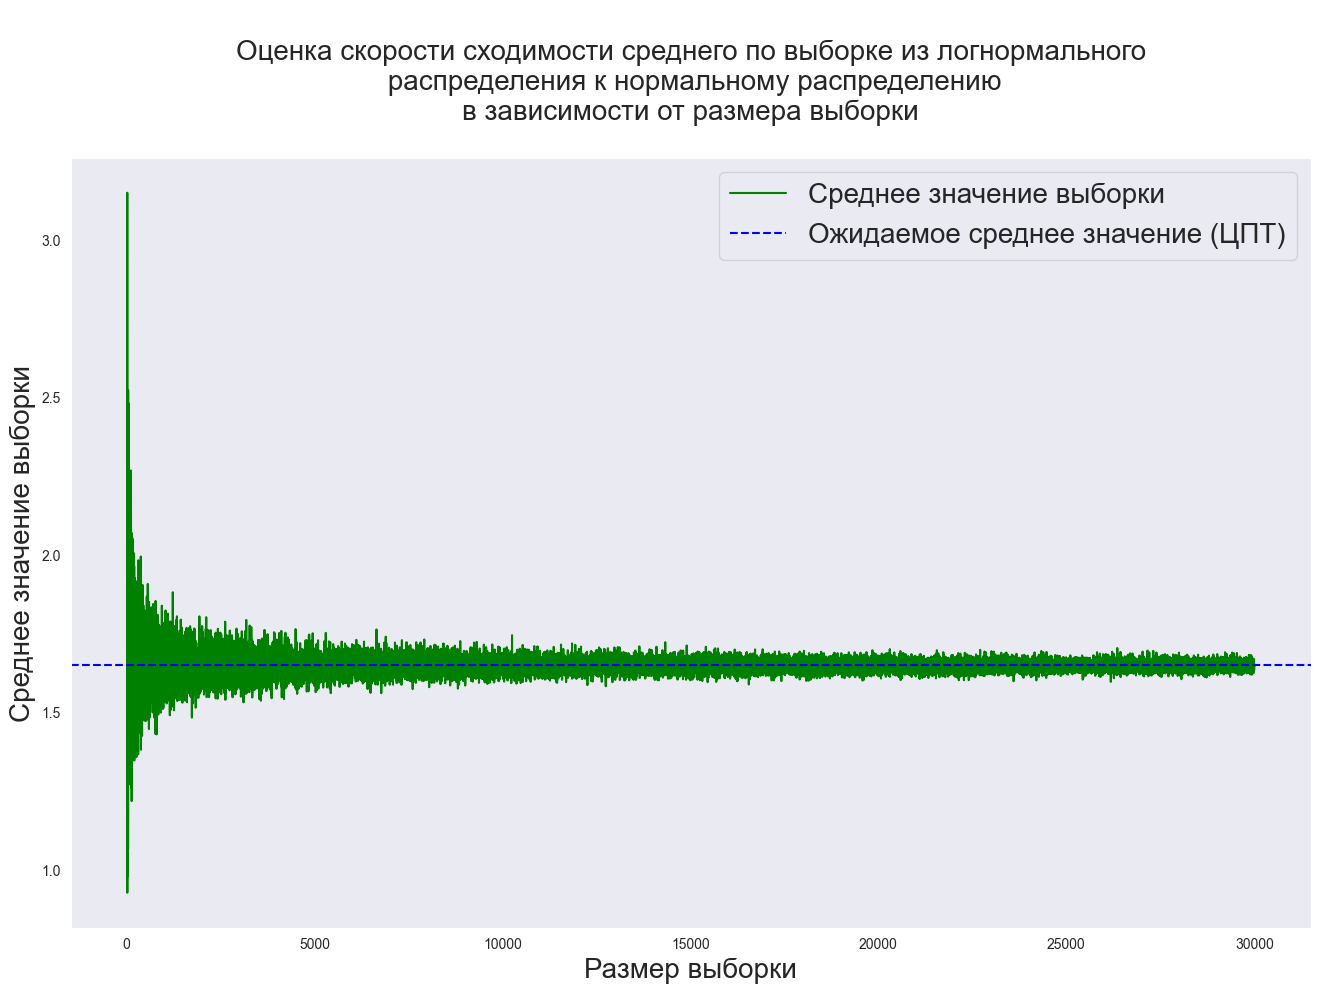

In [32]:
# Параметры логнормального распределения
mean, sigma = 0, 1  # Среднее и стандартное отклонение
# Размеры выборок для исследования
sample_sizes = np.arange(10, 30001, 1)
# Вызов функции с параметрами
task1_1(mean, sigma, sample_sizes)


## Чем больше размер выборки, тем лучше среднее значение выборки стремится к ожидаемому среднему значению по ЦПТ

In [49]:
def task1_2(mean, sample_size, sigmas):
    # Рассчитаем среднее значение для каждого значения sigma
    sample_means = [np.mean(np.random.lognormal(mean, sigma, sample_size)) for sigma in sigmas]
    
    # Ожидаемое среднее значение для каждого значения sigma
    expected_means = [np.exp(mean + sigma**2 / 2) for sigma in sigmas]
    
    # Построение графика с использованием seaborn
    plt.figure(figsize=(16, 10))
    
    # Линия среднего значения выборки
    sns.lineplot(x=sigmas, y=sample_means, label="Среднее значение выборки", color="green")
    
    # Линия ожидаемого среднего значения
    plt.plot(sigmas, expected_means, color="blue", linestyle="--", label="Ожидаемое среднее значение (ЦПТ)")
    
    # Добавим легенду, подписи и заголовок
    plt.legend(fontsize=20)
    plt.xlabel("Дисперсия (σ)", fontsize=20)
    plt.ylabel("Среднее значение выборки", fontsize=20)
    plt.title("\nОценка скорости сходимости среднего по выборке из логнормального\n"
              " распределения к нормальному распределению\nв зависимости от дисперсии\n",
              fontsize=20)
    plt.grid(False)
    
    # Отображение графика
    plt.show()

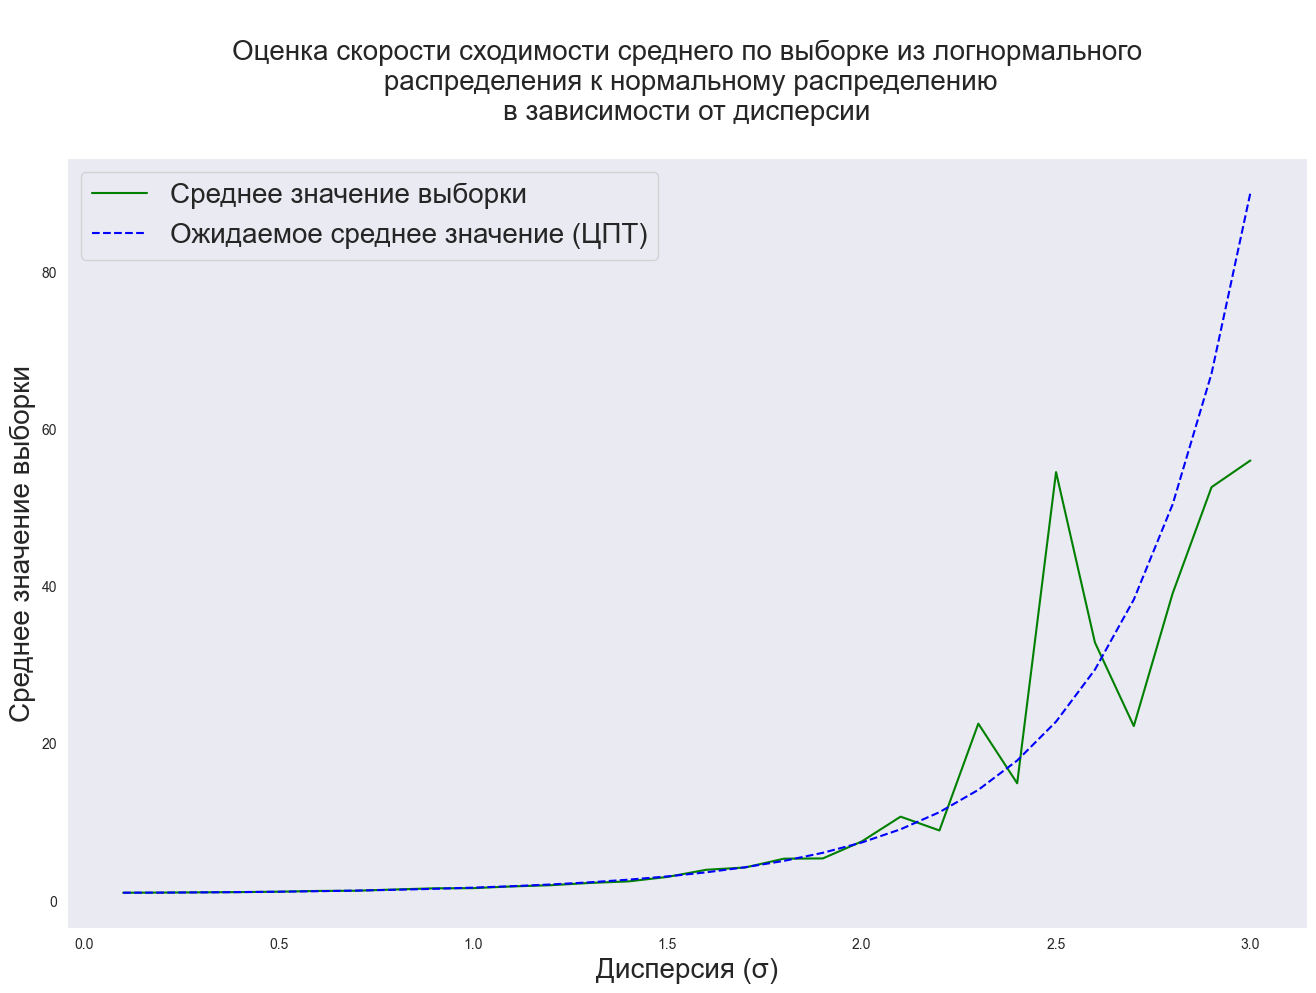

In [50]:
# Параметры логнормального распределения
mean = 0  # Среднее
sample_size = 1000  # Фиксированный размер выборки
sigmas = np.arange(0.1, 3.1, 0.1)  # Разные значения параметра отклонения

# Вызов функции с параметрами
task1_2(mean, sample_size, sigmas)

## Чем больше дисперсия логнормального распределения, тем хуже среднее значение выборки стремится к ожидаемому среднему значению по ЦПТ

# Задача 2

Возьмите [данные](https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop) с Kaggle и оцените равномерность разбиения их на группы (для будущего АБ-теста) с помощью различных видов хеширования:

1. md5
2. sha256
3. Улучшится ли равномерность, если вместо одинарного использования md5 применить [вот такую](https://towardsdatascience.com/assign-experiment-variants-at-scale-in-a-b-tests-e80fedb2779d) двухуровневую процедуру с тем же md5, проверить на тех же данных

In [51]:
# Загрузка данных
data = pd.concat([pd.read_csv("./2019-Dec.csv"),
                  pd.read_csv("./2019-Nov.csv"),
                  pd.read_csv("./2019-Oct.csv"),
                  pd.read_csv("./2020-Feb.csv"),
                  pd.read_csv("./2020-Jan.csv")])

In [52]:
data.size

186235560

In [53]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [54]:
user_ids = data["user_id"].unique()  # Выделяем уникальные user_ids
user_ids

array([576802932, 412120092, 494077766, ..., 608821929, 608822072,
       560889817], dtype=int64)

In [107]:
class EvaluateHash:
    def __init__(self, hash_func: str, salt: str = "AINDO", impact_rate: float = 0.1):
        if hash_func == 'md5':
            self.hash_func = self.hash_md5
        elif hash_func == 'sha256':
            self.hash_func = self.hash_sha256
        elif hash_func == 'two_level_md5':
            self.hash_func = self.two_level_md5
        else:
            raise ValueError("Unsupported hash function")
        self.salt = salt
        self.impact_rate = impact_rate  # Используем impact_rate для фильтрации пользователей

    def __call__(self, user_ids: int, n_buckets: int, n_checks: int) -> np.ndarray:
        self.user_ids = user_ids
        self.n_buckets = n_buckets
        self.n_checks = n_checks
        return self.false_ratio(), self.sensivity()

    # MD5-хеш-функция
    @staticmethod
    def hash_md5(argument: str) -> int:
        return int(hashlib.md5(argument.encode()).hexdigest(), 16)

    # SHA256-хеш-функция
    @staticmethod
    def hash_sha256(argument: str) -> int:
        return int(hashlib.sha256(argument.encode()).hexdigest(), 16)

    # Двухэтапная хеш-функция MD5
    def two_level_md5(self, argument: str) -> int:
        level_1_hash = self.hash_md5(argument)
        max_128_bit_value = float(0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF)  # Максимальное 128-битное значение
        r = (level_1_hash / max_128_bit_value) * 10000
        r = int(r)
        if r / 100 >= self.impact_rate * 1000:
            return -1
        return r % self.n_buckets

    @staticmethod
    def add(bucket_counts: np.ndarray, ratio: float) -> np.ndarray:
        bucket_counts[0] += int(bucket_counts[0] * ratio)
        return bucket_counts

    @staticmethod
    def chi_2(bucket_counts: np.ndarray, alpha: float = 0.05) -> bool:
        n_buckets = bucket_counts.size
        n_samples = bucket_counts.sum()
        expected_counts = np.full(n_buckets, n_samples / n_buckets)
        chi2_stat = ((bucket_counts - expected_counts) ** 2 / expected_counts).sum()
        p_value = 1 - chi2.cdf(chi2_stat, n_buckets - 1)
        return p_value < alpha

    def sensivity(self, srm_increment: float = 0.001, max_srm: float = 0.1) -> None:
        log = np.zeros(self.n_checks)
        for i_check in trange(self.n_checks):
            bucket_counts = self.gen_random_bucket_counts()
            srm = 0
            while srm <= max_srm:
                bucket_counts = self.add(bucket_counts, srm_increment)
                srm += srm_increment
                if self.chi_2(bucket_counts):
                    break
            log[i_check] = srm
        return log.mean(), log.std()

    def false_ratio(self):
        false_positive_count = 0
        for _ in tqdm(range(self.n_checks)):
            bucket_counts = self.gen_random_bucket_counts()
            false_positive_count += self.chi_2(bucket_counts)
        return false_positive_count / self.n_checks
    
    # Метод для визуализации распределения пользователей по бакетам
    def plot_bucket_distribution(self, user_ids: np.ndarray, n_buckets: int):
        bucket_counts = self.split_users_to_buckets(user_ids, "layer_visualization_" + str(np.random.choice(1000)))
        # Построение графика распределения
        plt.figure(figsize=(10, 6))
        plt.bar(range(n_buckets), bucket_counts, color="blue")
        plt.title(f"Рспределение бакетов хэшом: {self.hash_func.__name__}")
        plt.xlabel("Номер бакета")
        plt.ylabel("Количество пользователей")
        plt.ylim(1500, 1800)
        plt.grid(True)
        plt.savefig(f"{self.hash_func.__name__}.png", dpi=300)
        plt.close()

    def gen_random_bucket_counts(self) -> np.ndarray:
        layer_id = "layer_test_" + str(np.random.choice(1000))
        bucket_counts = self.split_users_to_buckets(self.user_ids, layer_id)
        return bucket_counts

    def split_users_to_buckets(self, user_ids: np.ndarray, layer_id: str) -> np.ndarray:
        bucket_counts = np.zeros(self.n_buckets, dtype=np.int64)
        for user_id in user_ids:
            hash_argument = str(user_id) + layer_id + self.salt
            bucket_id = self.hash_func(hash_argument) % self.n_buckets
            if bucket_id == -1:
                continue
            bucket_counts[bucket_id] += 1
        return bucket_counts


In [108]:
# Пример данных
user_ids = user_ids.astype(np.int64)
n_buckets = 1000
n_checks = 50
salt = "AINDO"

# Создаем объекты для каждой хеш-функции
test_hash_md5 = EvaluateHash('md5', salt)
test_hash_sha256 = EvaluateHash('sha256', salt)
test_hash_two_level_md5 = EvaluateHash('two_level_md5', salt)

# Выполняем тесты для каждой хеш-функции
result_md5 = test_hash_md5(user_ids, n_buckets, n_checks)
test_hash_md5.plot_bucket_distribution(user_ids, n_buckets)
result_sha256 = test_hash_sha256(user_ids, n_buckets, n_checks)
test_hash_sha256.plot_bucket_distribution(user_ids, n_buckets)
result_two_level_md5 = test_hash_two_level_md5(user_ids, n_buckets, n_checks)
test_hash_two_level_md5.plot_bucket_distribution(user_ids, n_buckets)

# Создаем DataFrame для красивого вывода
results_df = pd.DataFrame({
    'Hash Function': ['MD5', 'SHA256', 'Two-level MD5'],
    'False Ratio': [result_md5[0], result_sha256[0], result_two_level_md5[0]],
    'Sensitivity Mean': [result_md5[1][0], result_sha256[1][0], result_two_level_md5[1][0]],
    'Sensitivity Std': [result_md5[1][1], result_sha256[1][1], result_two_level_md5[1][1]]
})

# Выводим таблицу с результатами
print(results_df.to_string(index=False))

100%|██████████| 50/50 [03:11<00:00,  3.82s/it]


Hash Function  False Ratio  Sensitivity Mean  Sensitivity Std
          MD5         0.04           0.09802     1.386000e-02
       SHA256         0.02           0.10000     2.775558e-17
Two-level MD5         0.06           0.09530     1.959311e-02


## Если честно, я ничего не понял, но было интересно :)
## Получилось, что SHA256 дает более равномерное распределение в бакетах, чем MD5 и Two-level MD5, но есть сомнения по поводу моей реализации двухэтапного хеширования, в статье указано было 64 бит, а я использовал 128 бит для MD5, иначе числа большие получались, ну там еще нуль приписал кое-где)))

# Задача 3

Напишите функцию для оценки доверительного интервала для параметра в выборке с помощью Пуассоновского бутстрепа.
Функция должна принимать на вход выборку и агрегационную функцию, с помощью которой будет вычисляться статистика по выборке, например:

    PoissonBootstrap(sample, np.median)
    
или
    
    PoissonBootstrap(sample, lambda x: np.median(x)/np.mean(x))
    
    

In [112]:
def PoissonBootstrap(sample, agg_func, n_iterations=100, alpha=0.05):
    # Преобразование входных данных в numpy-массив
    sample = np.array(sample)
    # Количество элементов в выборке
    n = len(sample)
    # Хранение результатов агрегации для каждого бутстрепа
    stats = []
    # Выполнение бутстрепа n_iterations раз
    for _ in tqdm(range(n_iterations)):
        # Генерация Пуассоновских весов
        weights = np.random.poisson(1, n)
        # Вычисление взвешенной статистики
        weighted_stat = agg_func(np.repeat(sample, weights))
        # Сохранение результата
        stats.append(weighted_stat)
    # Сортируем результаты для вычисления доверительного интервала
    stats = np.sort(stats)
    # Вычисление границ доверительного интервала
    lower_bound = np.percentile(stats, 100 * (alpha / 2))
    upper_bound = np.percentile(stats, 100 * (1 - alpha / 2))
    return lower_bound, upper_bound

In [115]:
result = PoissonBootstrap(data["price"].values, np.mean)
print("Доверительный интервал для среднего значения цены:", result)

result_custom = PoissonBootstrap(data["price"].values, lambda x: np.median(x) / np.mean(x))
print("Доверительный интервал для медианы / среднего цены:", result_custom)

100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Доверительный интервал для среднего значения цены: (8.527095663876334, 8.543483444370569)


100%|██████████| 100/100 [01:40<00:00,  1.01s/it]

Доверительный интервал для медианы / среднего цены: (0.47408447771993767, 0.47498111037074214)


## Проверил, вроде адекватно работает)

# Задача 4

C помощью численного эксперимента показать, что t-тест над рангами в некотором смысле эквивалентен тесту Манна-Уитни.
В качестве пояснения можете использовать материал [Линделёва](https://lindeloev.github.io/tests-as-linear/)

In [152]:
# Установим стиль визуализации
sns.set(style="whitegrid")

# Функция для генерации двух выборок данных из заданного распределения
def generate_samples(distribution='Нормальное', size=30, mean_diff=0):
    np.random.seed(42)
    if distribution == 'Нормальное':
        group1 = np.random.normal(0, 1, size)
        group2 = np.random.normal(mean_diff, 1, size)
    elif distribution == 'Экспоненциальное':
        group1 = np.random.exponential(1, size)
        group2 = np.random.exponential(1, size) + mean_diff
    return group1, group2

# Функция для применения t-теста к рангам двух выборок
def rank_t_test(group1, group2):
    combined = np.concatenate([group1, group2])
    ranks = rankdata(combined)
    ranks1 = ranks[:len(group1)]
    ranks2 = ranks[len(group1):]    
    return ttest_ind(ranks1, ranks2)

# Функция для проведения эксперимента и визуализации
def run_experiment(distribution='normal', sizes=[100, 20], mean_diff=0):
    plt.figure(figsize=(15, len(sizes) * 5))
    
    for i, size in enumerate(sizes):
        # Генерация данных
        group1, group2 = generate_samples(distribution, size, mean_diff)

        # Применяем t-тест над рангами
        t_test_result = rank_t_test(group1, group2)

        # Применяем тест Манна-Уитни
        mannwhitney_result = mannwhitneyu(group1, group2)

        # Визуализация
        plt.subplot(len(sizes), 1, i + 1)
        sns.histplot(group1, color='blue', kde=True, stat="density", label='Первое распределение', bins=20, alpha=0.5)
        sns.histplot(group2, color='orange', kde=True, stat="density", label='Второе распределение', bins=20, alpha=0.5)
        
        plt.axvline(x=np.mean(group1), color='blue', linestyle='dashed', linewidth=1)
        plt.axvline(x=np.mean(group2), color='orange', linestyle='dashed', linewidth=1)

        plt.title(f'Распределение: {distribution.capitalize()} | Размер: {size}')
        plt.xlabel('Значение')
        plt.ylabel('Плотность')
        plt.legend()
        plt.grid(True)
        
        # Печать результатов
        print(f"Размер выборки: {size}")
        print(f"Ранговый t-тест: Статистика: {t_test_result.statistic:.4f}, p-значение: {t_test_result.pvalue:.4f}")
        print(f"Тест Манна-Уитни: Статистика U: {mannwhitney_result.statistic:.4f}, p-значение: {mannwhitney_result.pvalue:.4f}\n")

    plt.tight_layout()
    plt.show()

Размер выборки: 100000
Ранговый t-тест: Статистика: -0.1067, p-значение: 0.9150
Тест Манна-Уитни: Статистика U: 4998621935.0000, p-значение: 0.9150

Размер выборки: 200000
Ранговый t-тест: Статистика: 0.5952, p-значение: 0.5517
Тест Манна-Уитни: Статистика U: 20021734837.0000, p-значение: 0.5517



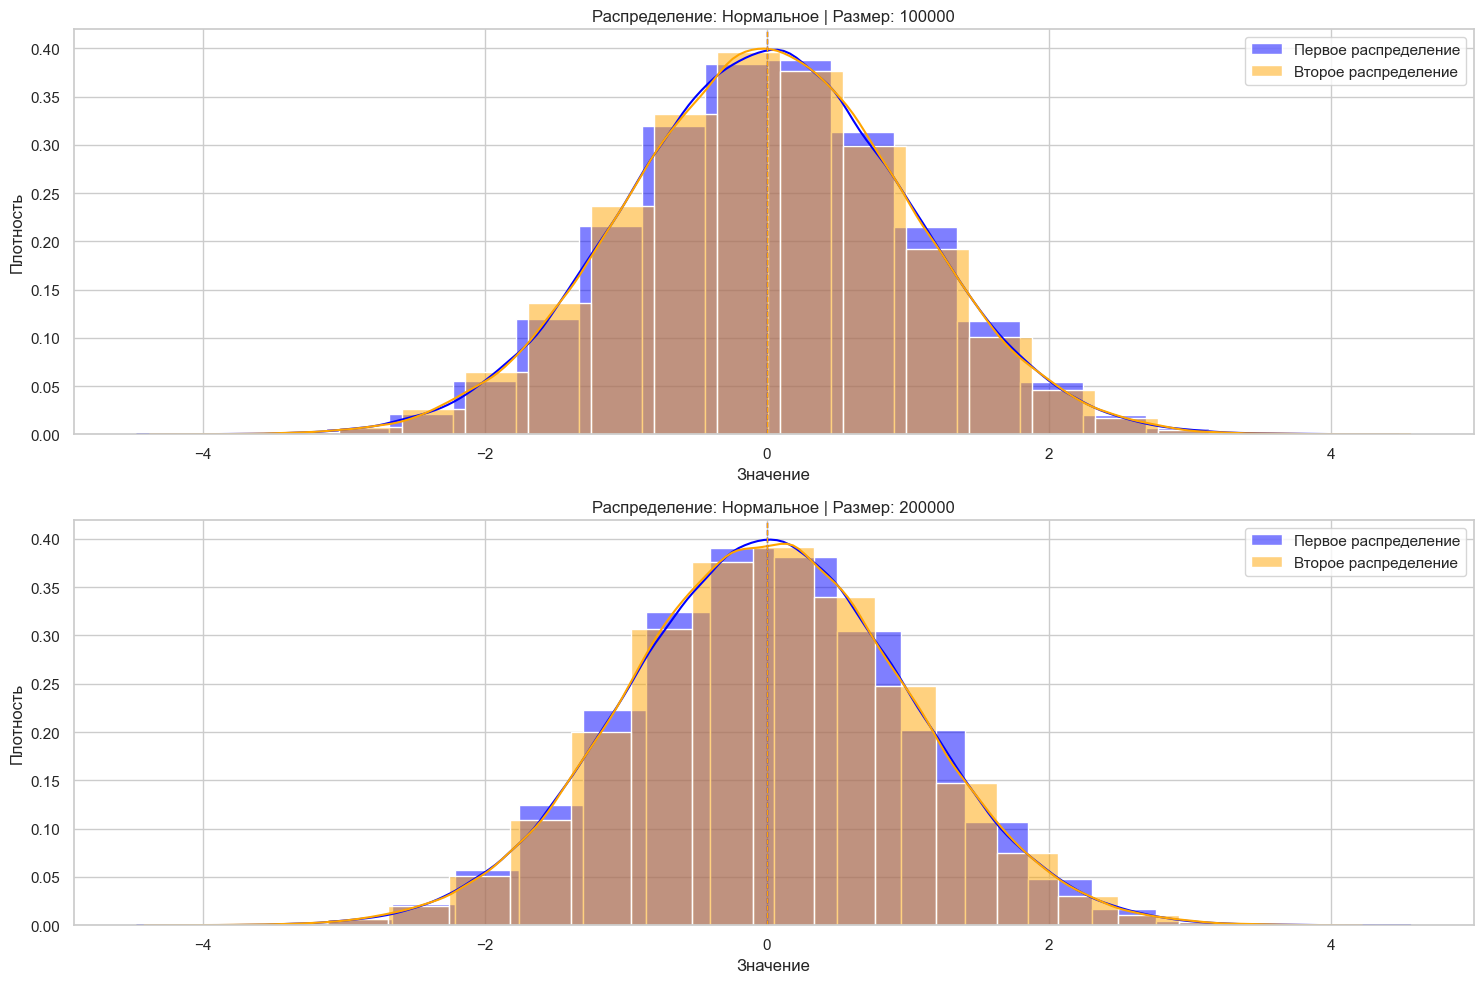

Размер выборки: 100000
Ранговый t-тест: Статистика: -1.4289, p-значение: 0.1530
Тест Манна-Уитни: Статистика U: 4981553472.0000, p-значение: 0.1530

Размер выборки: 200000
Ранговый t-тест: Статистика: 0.6696, p-значение: 0.5031
Тест Манна-Уитни: Статистика U: 20024451536.0000, p-значение: 0.5031



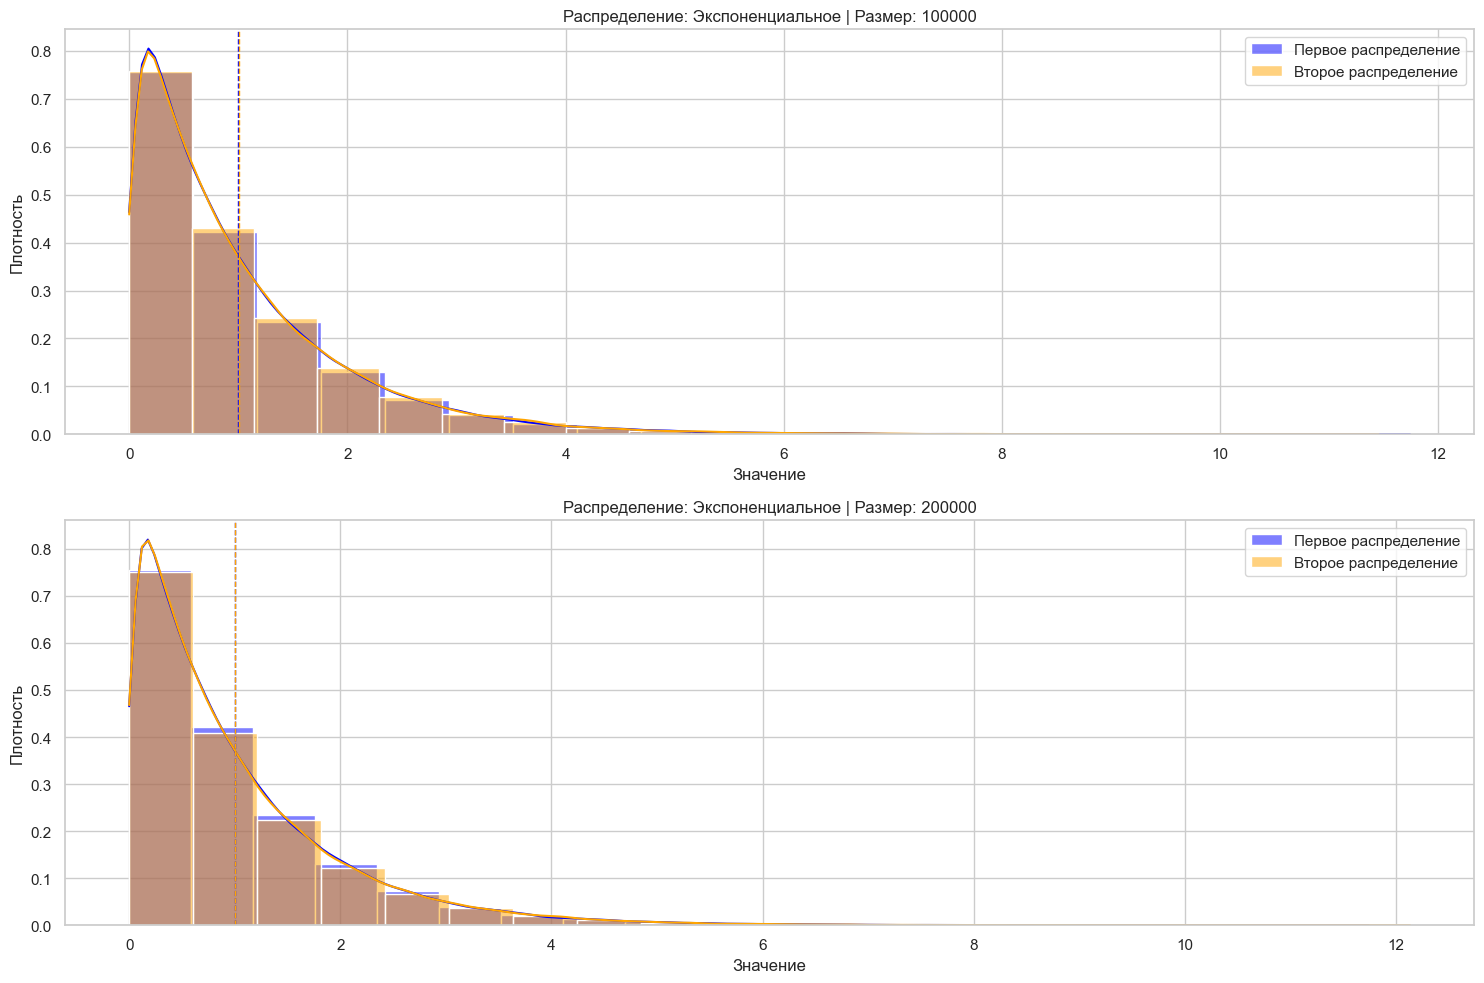

In [153]:
# Проведем эксперименты для различных распределений и размеров выборок
for distribution in ['Нормальное', 'Экспоненциальное']:
    run_experiment(distribution=distribution, sizes=[100000, 200000], mean_diff=0)

## pvalue для t-теста и теста Манна-Уитни всегда рассчитываются одинаковые, то есть они эквивалентны